<a href="https://colab.research.google.com/github/JeanMichelDeveloper/Training/blob/main/Extract_foreground_in_an_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install opencv
!pip install opencv-contrib-python==4.6.00.66

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#import necessary libraries
import cv2
from google.colab.patches import cv2_imshow
import numpy
import plotly.express as px

In [3]:
!wget "https://cdn.pixabay.com/photo/2022/04/12/01/13/stop-7126941_1280.jpg"

--2022-12-16 17:43:38--  https://cdn.pixabay.com/photo/2022/04/12/01/13/stop-7126941_1280.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.37.244, 172.64.150.12, 2606:4700:4400::ac40:960c, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.37.244|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89091 (87K) [binary/octet-stream]
Saving to: ‘stop-7126941_1280.jpg’

stop-7126941_1280.j 100%[===================>]  87.00K  --.-KB/s    in 0.01s   

2022-12-16 17:43:39 (6.44 MB/s) - ‘stop-7126941_1280.jpg’ saved [89091/89091]



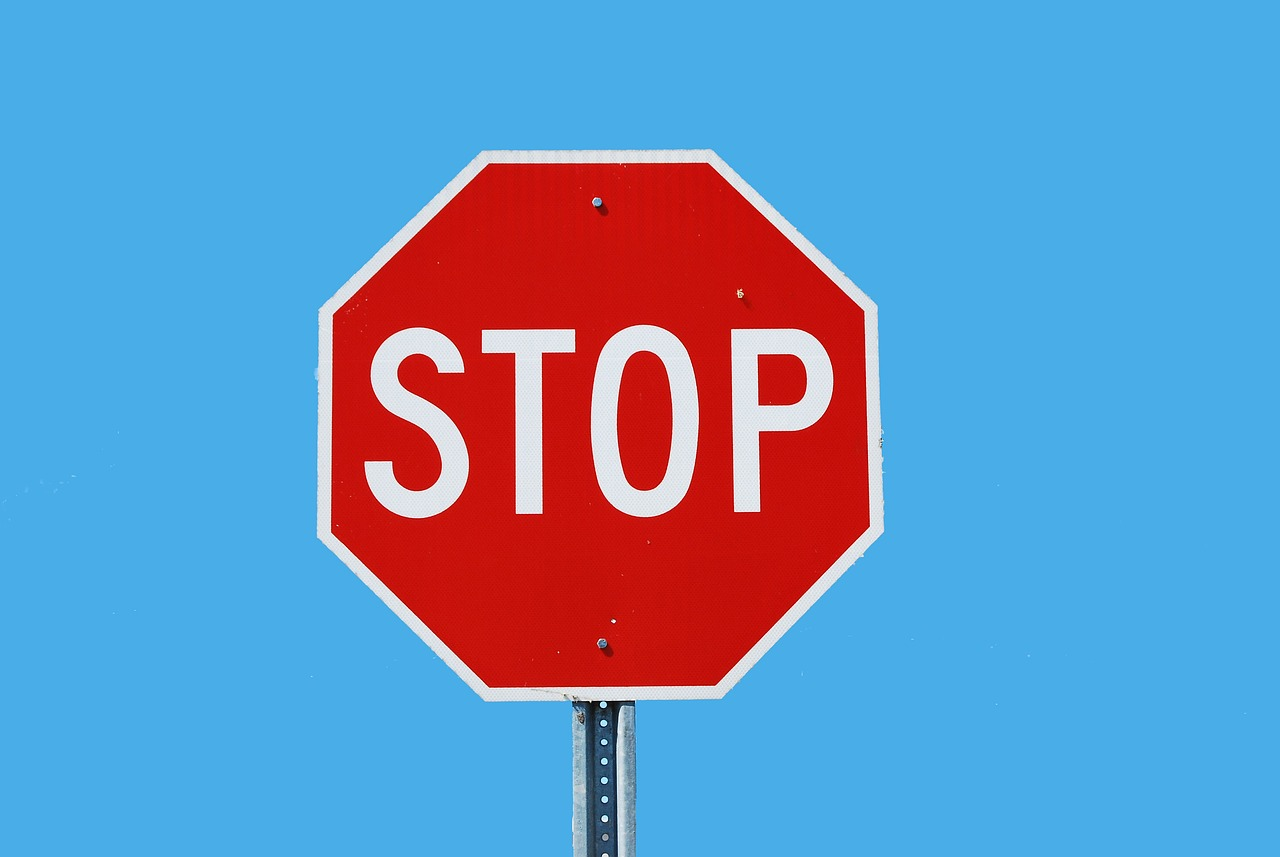

In [4]:
image = cv2.imread("stop-7126941_1280.jpg")

cv2_imshow(image)


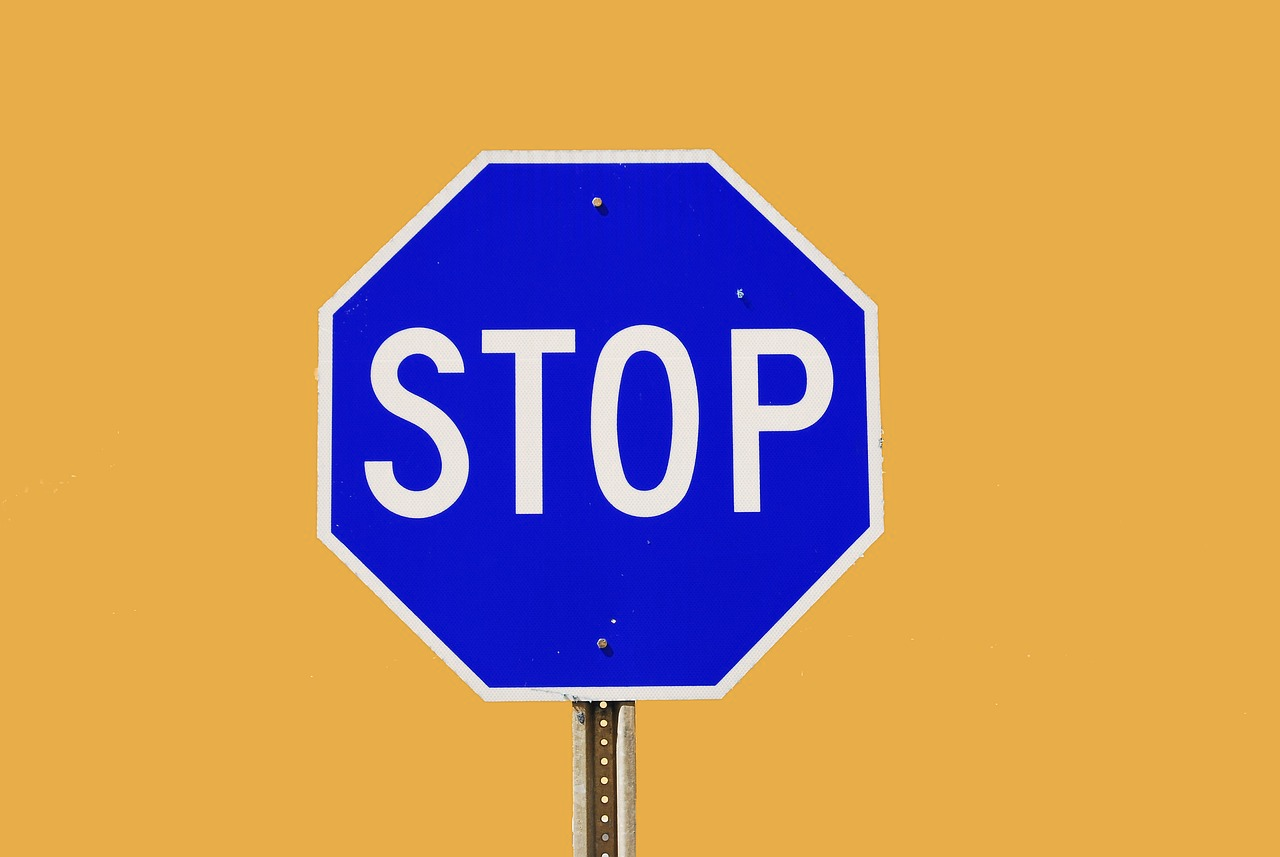

In [5]:
#display image with coordinate
px.imshow(image)

In [15]:
#determine rectangle used to identify foreground
x = 315
y = 145
width = 565
height = 555
rect = (x, y, width, height)

In [16]:
#create mask
mask = numpy.zeros(image.shape[:2], numpy.uint8)

background_model = numpy.zeros((1,65), numpy.float64)

foreground_model = numpy.zeros((1,65), numpy.float64)

iterations = 10

cv2.grabCut(image,
            mask,
            rect = rect,
            bgdModel = background_model,
            fgdModel = foreground_model,
            iterCount = iterations,
            mode = cv2.GC_INIT_WITH_RECT)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[ 9.60040264e-01,  3.31215157e-03,  2.27500960e-02,
          2.30079851e-03,  1.15966900e-02,  2.32000000e+02,
          1.73000000e+02,  7.30000000e+01,  1.04581988e+02,
          7.94201651e+01,  4.93458916e+01,  2.31710808e+02,
          1.73341274e+02,  7.28640756e+01,  6.04251033e+01,
          4.46766529e+01,  2.61838843e+01,  2.04701476e+02,
          1.77754458e+02,  1.31129637e+02,  9.99999999e-03,
         -7.27595761e-12, -3.63797881e-12, -7.27595761e-12,
          1.00000000e-02,  0.00000000e+00, -3.63797881e-12,
          0.00000000e+00,  1.00000000e-02,  1.10734846e+02,
          7.76636140e+01,  4.50434029e+01,  7.76636140e+01,
          7.06340103e+01,  5.32995913e+01,  4.50434029e+01,
          5.32995913e+01,  7.01099966e+01,  8.72773514

In [17]:
created_mask = numpy.where((mask == 2) | (mask == 0), 0, 1).astype("uint8")

created_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

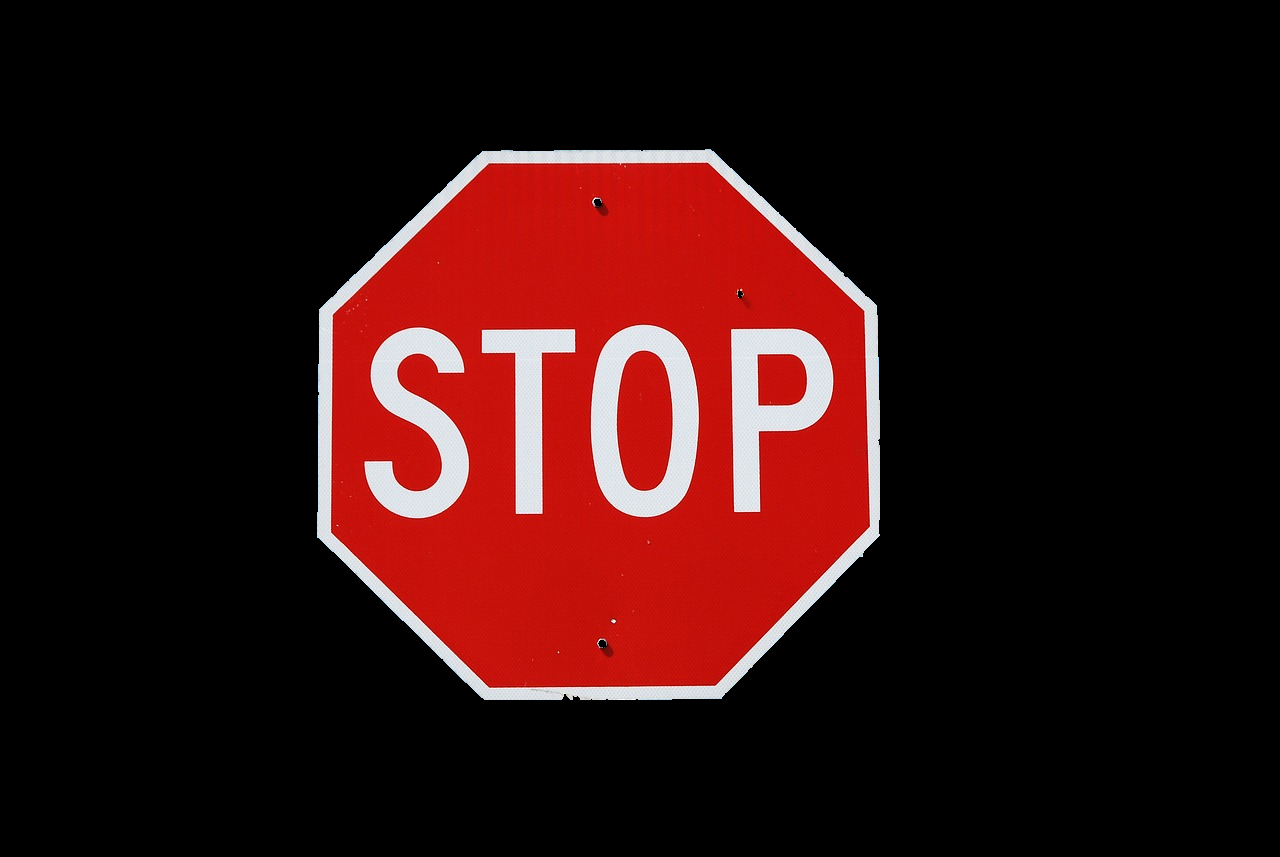

In [18]:
mask_image = image * created_mask[:, :, numpy.newaxis]

cv2_imshow(mask_image)